**from google.colab import drive:** This imports the drive module from the google.colab library. The drive module contains functions for interacting with Google Drive.

**drive.mount('/content/drive'):** This function call mounts your Google Drive at the specified mount point (/content/drive). After executing this line, the contents of your Google Drive will be accessible from the Colab notebook as if they are part of the local file system at the path /content/drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We'hv set a variable path that specifies the directory location on your mounted Google Drive where we're storing resources related to our deepfake detection project. This path points to a folder named "Deepfake-detection" within the "MyDrive" directory of our Google Drive.

In [ ]:
path="/content/drive/MyDrive/Deepfake-detection/"

**numpy:** This library is fundamental for scientific computing with Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of high-level mathematical functions to operate on these arrays.

**matplotlib.pyplot:** A plotting library that you can use to create figures and graphs. Helpful for visualizing data and results such as training and validation loss or accuracy.

**tensorflow.keras.layers:** Contains various layers that are the building blocks for neural networks. In your import:

**Input:** Used to instantiate a Keras tensor.

**Dense:** A regular densely-connected neural network layer.

**Flatten:** Flattens the input without affecting the batch size.

**Conv2D:** 2D convolution layer, which is particularly useful for image data.

**MaxPooling2D:** Used to reduce the spatial dimensions of the output from the previous convolutional layer.

**BatchNormalization:** Normalizes the activations of the previous layer at each batch, i.e., applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

**Dropout:** Randomly sets a fraction of input units to 0 at each update during training time, which helps prevent overfitting.

**Reshape:** Reshapes an output to a certain shape.

**Concatenate:** Concatenates a list of inputs.

**LeakyReLU:** An advanced version of ReLU that allows a small gradient when the unit is not active.

tensorflow.keras.preprocessing.image.ImageDataGenerator:
Used to augment the dataset by performing real-time data augmentation on images. This can include transformations like rotation, resizing, flipping, etc., which helps in enhancing the generalizability of the model.

**tensorflow.keras.optimizers.Adam:** An optimizer that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based on training data.

**tensorflow.keras.models.Model:** This API allows you to define a model with multiple inputs and outputs, which is useful for complex architectures.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

This code defines a dictionary named image_dimensions with three key-value pairs: 'height' with a value of 256, 'width' with a value of 256, and 'channels' with a value of 3. It represents the dimensions of an image with a height and width of 256 pixels each and 3 color channels (red, green, blue).







In [ ]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}

This code defines a Classifier class intended for machine learning models. It contains methods for prediction (predict), training (fit), evaluating accuracy (get_accuracy), and loading model weights (load). However, the constructor (__init__()) lacks parameters, and there's an incomplete implementation indicated by the ellipsis (...) at the end of the load method.

In [ ]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0

    def predict(self, x):
        return self.model.predict(x)

    def fit(self, x, y):
        return self.model.train_on_batch(x, y)

    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)

    def load(self, path):
        self.model.load_weights(path)

This code defines a Meso4 class, a specific implementation of the Classifier class. It represents the MesoNet model, tailored for deepfake detection. The model architecture consists of four convolutional layers with varying filter sizes and depths, followed by max-pooling and batch normalization layers for downsampling and normalization, respectively. It concludes with two fully connected layers, ending with a sigmoid activation for binary classification.







In [ ]:
# Create a MesoNet class using the Classifier

class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])

    def init_model(self):
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))

        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)

        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)

        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)

        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)

        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

This code instantiates a Meso4 model object named meso and loads pretrained weights into it. The Meso4 class is initialized without any arguments, using default parameters. Then, the load() method is called to load the pretrained weights from the specified path (path+'weights/Meso4_DF'). These weights are essential for initializing the model with prelearned parameters, which is crucial for its performance in deepfake detection tasks.

In [ ]:
# Instantiate a MesoNet model with pretrained weights
meso = Meso4()
meso.load(path+'weights/Meso4_DF')

This snippet prepares the image data for feeding into the network. It first creates an ImageDataGenerator object called dataGenerator, which rescales the pixel values of the images to a range between 0 and 1 by dividing each pixel value by 255.

Then, it instantiates a generator using the flow_from_directory method of the dataGenerator object. This generator reads images from the specified directory (path+'data/'), resizes them to a target size of 256x256 pixels, sets the batch size to 1 (meaning one image per batch), and specifies the class mode as binary, indicating a binary classification task (e.g., real vs. fake). This generator is crucial for efficiently feeding batches of images into the model during training or evaluation.

In [ ]:
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_directory(
    path+'data/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

Found 7104 images belonging to 2 classes.


This line of code checks the class assignment of the generator. In a classification task, it's essential to know which label corresponds to which class. By calling generator.class_indices, we get a dictionary where the keys represent the class names, and the values represent the corresponding class indices or labels. This dictionary provides insight into how the generator has mapped the class names to numerical labels, facilitating the interpretation of model predictions and evaluation metrics.

In [ ]:
# Checking class assignment
generator.class_indices

{'DeepFake': 0, 'Real': 1}

This block of code explains the removal of the ".ipynb_checkpoints" directory, which is typically created by Jupyter Notebooks for autosaving purposes. The presence of this directory can interfere with the flow_from_directory function, which is used to generate batches of image data from a directory. Therefore, it's necessary to remove this directory for the flow_from_directory function to work correctly.

The code snippet first attempts to remove the ".ipynb_checkpoints" directory using the Windows command rmdir /s /q c:data\.ipynb_checkpoints. This command recursively (/s) removes the directory and its contents quietly (/q).



In [ ]:
# '.ipynb_checkpoints' is a *hidden* file Jupyter creates for autosaves
# It must be removed for flow_from_directory to work.
!rmdir /s /q c:data\.ipynb_checkpoints



This code snippet recreates the image data generator (generator) after removing the '.ipynb_checkpoints' directory. It initializes a new ImageDataGenerator instance with pixel value rescaling. Then, it creates the generator using the flow_from_directory method, specifying directory path, image size, batch size, and class mode. Finally, it verifies the class assignment using the class_indices attribute.

In [ ]:
# Recreating generator after removing '.ipynb_checkpoints'
dataGenerator = ImageDataGenerator(rescale=1./255)

generator = dataGenerator.flow_from_directory(
    path+'data/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

# Re-checking class assignment after removing it
generator.class_indices

Found 7104 images belonging to 2 classes.


{'DeepFake': 0, 'Real': 1}

This code snippet fetches the next image (X) and its corresponding label (y) from the generator. It then evaluates the prediction using the MesoNet model (meso) and prints the predicted likelihood of the image being a deepfake, the actual label, and whether the prediction is correct. Finally, it displays the image using Matplotlib.

1/1 [==============================] - 0s 386ms/step
Predicted likelihood: 0.9560
Actual label: 1
1/1 [==============================] - 0s 42ms/step

Correct prediction: True


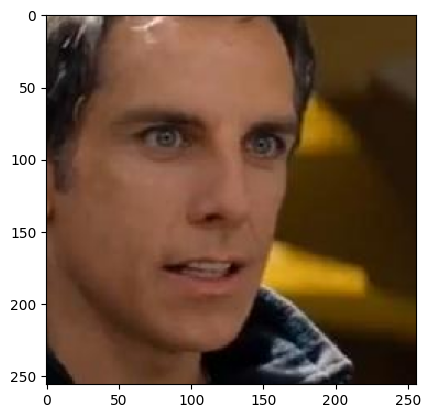

In [ ]:
# Rendering image X with label y for MesoNet
X, y = generator.next()

# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));

This code is setting up separate lists to organize correctly classified and misclassified images. There are four categories being considered: 'real' and 'deepfake', with corresponding lists for correctly classified and misclassified images and their predictions.

**correct_real:** List for correctly classified real images.

**correct_real_pred:** List for predictions corresponding to correctly classified real images.

**correct_deepfake:** List for correctly classified deepfake images.

**correct_deepfake_pred:** List for predictions corresponding to correctly classified deepfake images.

**misclassified_real:** List for misclassified real images.

**misclassified_real_pred:** List for predictions corresponding to misclassified real images.

**misclassified_deepfake:** List for misclassified deepfake images.

**misclassified_deepfake_pred:** List for predictions corresponding to misclassified deepfake images.







In [ ]:
# Creating separate lists for correctly classified and misclassified images
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

This block of code iterates over the validation set, generating predictions using the MesoNet model (meso).

 It categorizes the predictions into different lists based on whether they are correctly classified as real or deepfake images.

 These lists include correct_real and correct_deepfake for correctly classified images and misclassified_real and misclassified_deepfake for misclassified ones. Corresponding prediction values are stored in lists suffixed with _pred.

 Progress updates are printed every 1000 predictions, and a final message indicates the completion of all predictions.

In [ ]:
# Generating predictions on validation set, storing in separate lists
for i in range(len(generator.labels)):

    # Loading next picture, generating prediction
    X, y = generator.next()
    pred = meso.predict(X)[0][0]

    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)

    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')

    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 34ms/step
3000  predictions completed.
1/1 [==============================] - 0s 43ms/step
4000  predictions completed.
1/1 [==============================] - 0s 45ms/step
5000  predictions completed.
1/1 [==============================] - 0s 41ms/step
6000  predictions completed.
1/1 [==============================] - 0s 39ms/step
7000  predictions completed.
1/1 [==============================] - 0s 44ms/step
All 7104 predictions completed


This plotter function creates a visual representation of images along with their corresponding model confidence scores.

It takes two arguments:

images: A list of images to be plotted.

preds: A list of model confidence scores corresponding to each image.

The function generates a figure with a grid layout, where each cell contains an image along with its confidence score.

It randomly selects 12 images from the provided list.
For each selected image, it adds a subplot to the figure, displays the image, and sets the x-axis label to show the model confidence score.

Finally, it displays the figure with the plotted images.
The function returns nothing, as it only displays the plot.

In [ ]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

This function generates a plot showing a subset of correctly classified real images along with their corresponding model confidence scores. It selects 12 random images from the correct_real list and displays each image alongside its confidence score. This visualization aids in understanding the model's performance on correctly identifying real images and provides insight into the confidence level of the model's predictions.

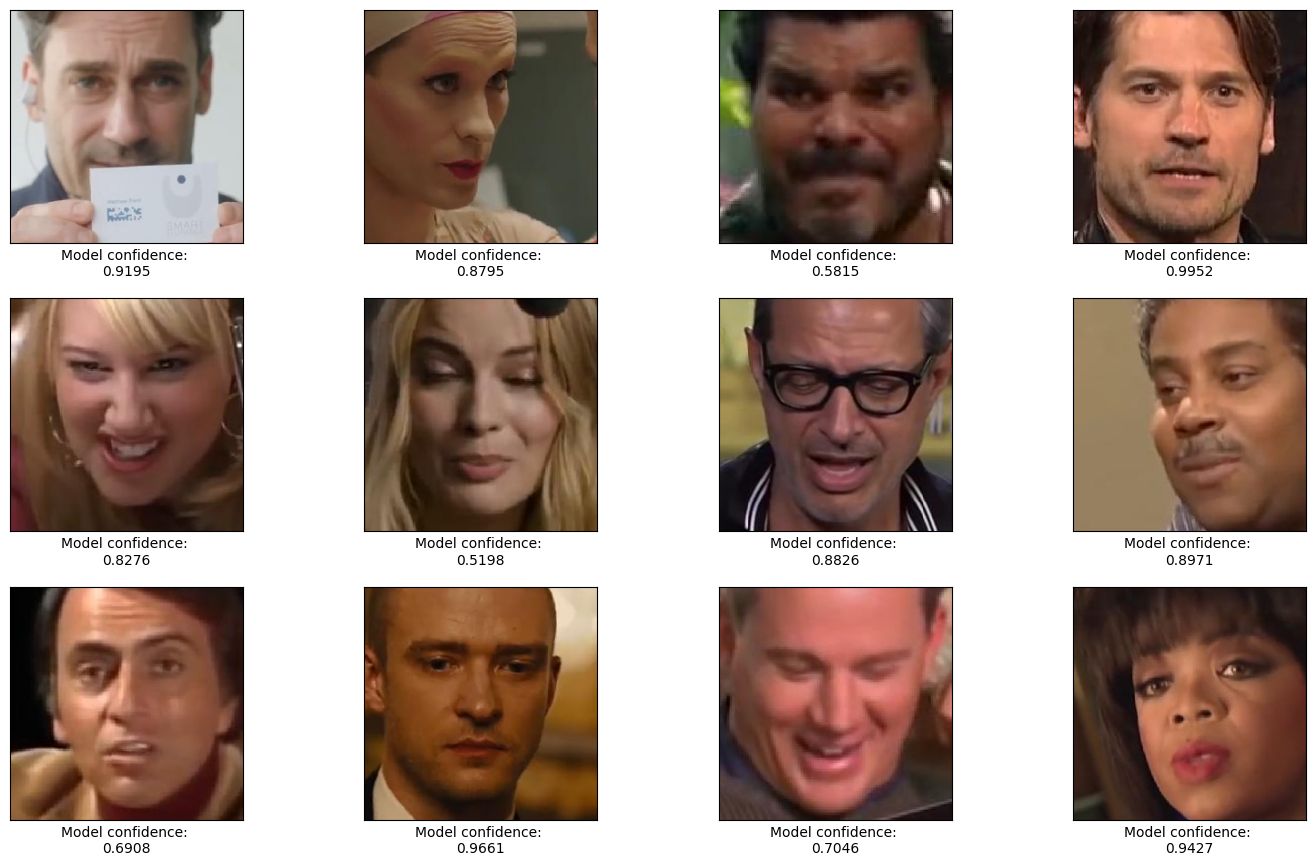

In [ ]:
plotter(correct_real, correct_real_pred)

This function creates a visualization displaying a subset of misclassified real images along with their associated model confidence scores. It randomly selects 12 images from the misclassified_real list and presents each image alongside its confidence score as predicted by the model. This visualization helps in analyzing the types of errors made by the model when classifying real images and provides insights into the model's weaknesses in distinguishing between real and fake images.

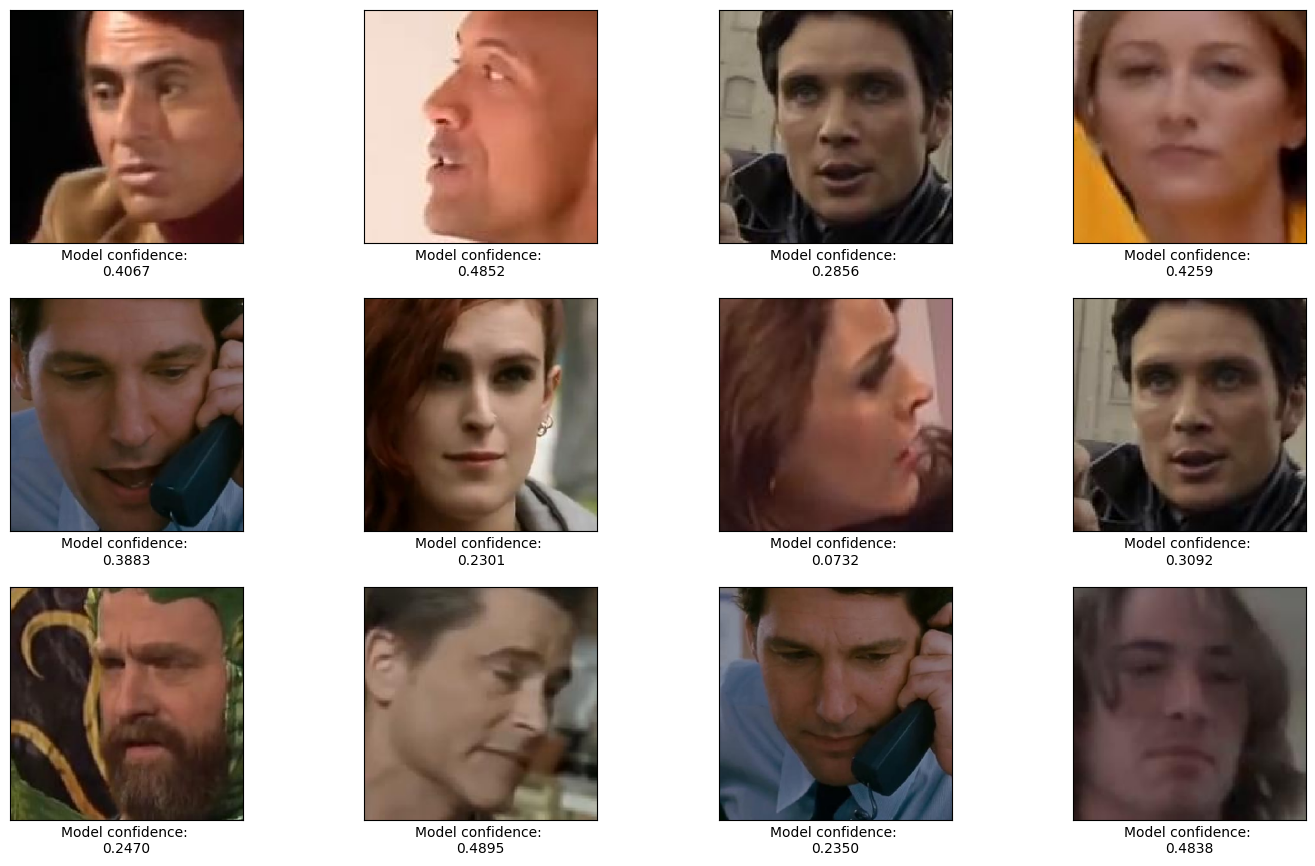

In [ ]:
plotter(misclassified_real, misclassified_real_pred)

This function generates a plot showing a subset of correctly classified deepfake images along with their corresponding model confidence scores. It randomly selects 12 images from the correct_deepfake list and displays each image along with its confidence score as predicted by the model. This visualization aids in understanding the model's performance in correctly identifying deepfake images and provides insights into the level of confidence the model has in its predictions for this class.

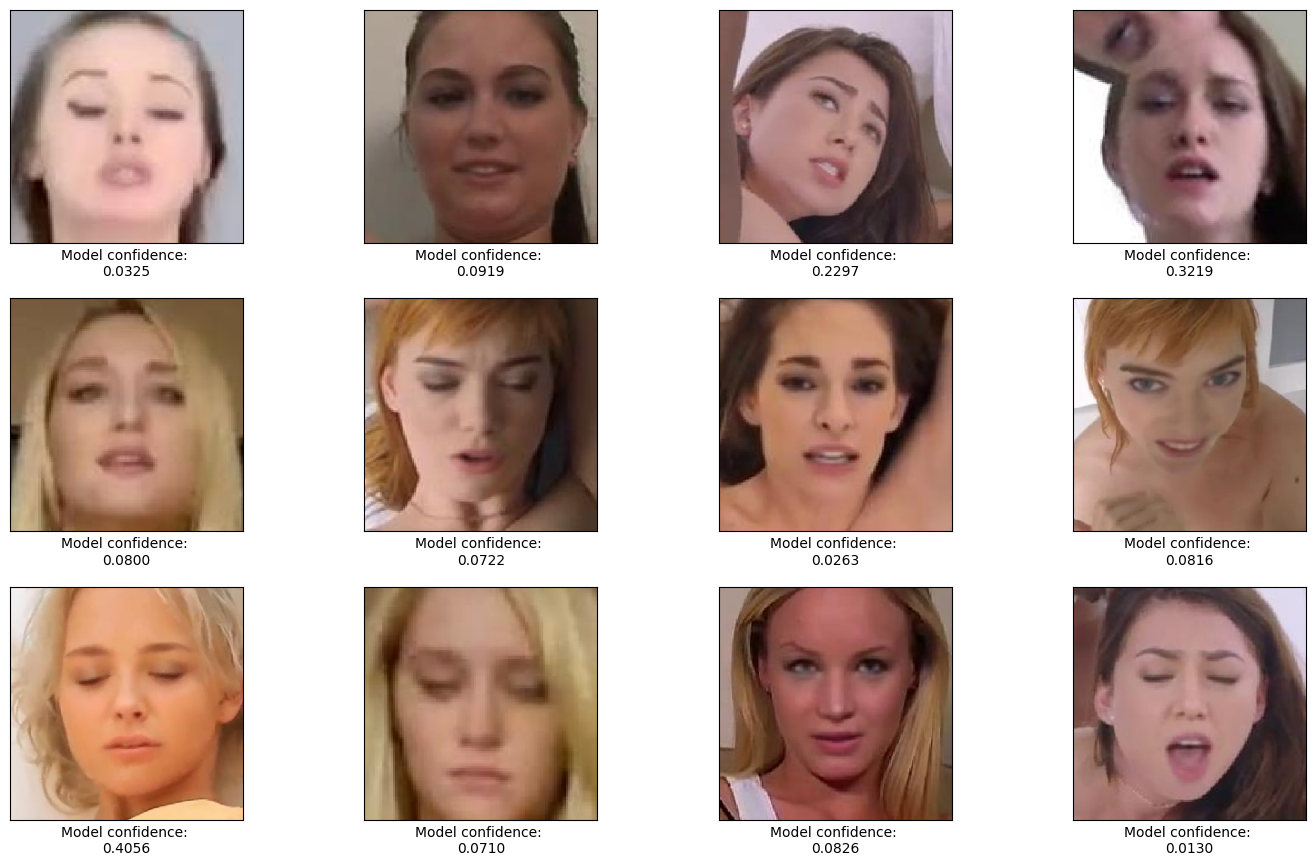

In [ ]:
plotter(correct_deepfake, correct_deepfake_pred)


This function creates a plot illustrating a subset of misclassified deepfake images alongside their model confidence scores. It randomly selects 12 misclassified deepfake images from the misclassified_deepfake list and displays each image with its corresponding confidence score as predicted by the model. This visualization helps in analyzing the types of deepfake images that the model struggles to classify correctly and provides insights into potential areas for improvement in the model's performance.

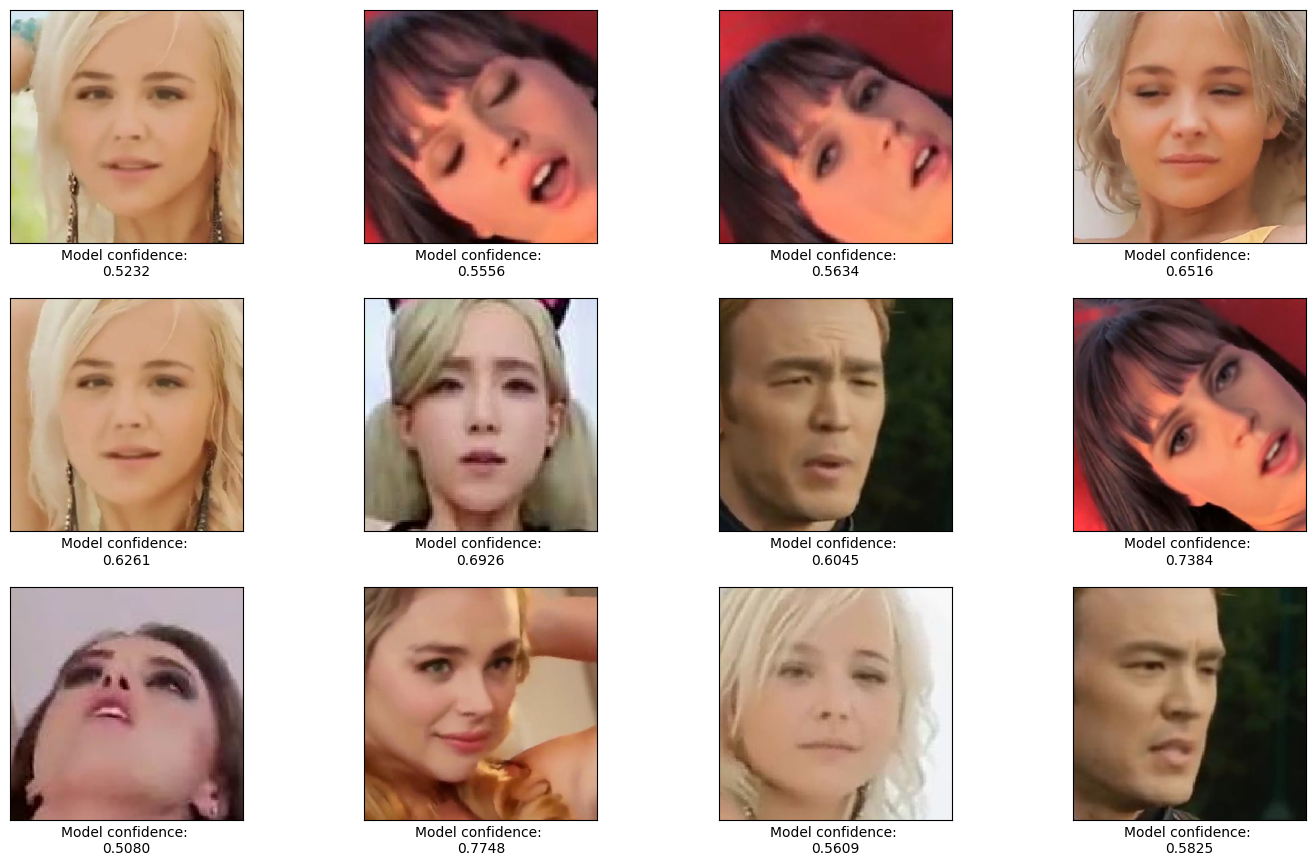

In [ ]:
plotter(misclassified_deepfake, misclassified_deepfake_pred)